In [26]:
import pandas as pd
import numpy as np

reactivePower=pd.read_csv('R3_12_47_1_AMI_residential_phase12_reactive_power.csv',skiprows=8)
realPower=pd.read_csv('R3_12_47_1_AMI_residential_phase12_real_power.csv',skiprows=8)

a=realPower.shape
a
type(a)
a[0]

realPower.head(5)

a=realPower.index

aa=realPower.ix[:,0:1]

type(aa)

type(aa[:1])

Create 15 minute interval of datetime array to retrive from the original data if it has minute by minute interval data

In [31]:
def dateArray15mins(data_array):
    from datetime import datetime, timedelta

    def datetime_range(start, end, delta):
        current = start
        while current < end:
            yield current
            current += delta

    dts = [dt.strftime('%Y-%m-%dT%H:%M:%S') for dt in 
           datetime_range((np.datetime64(data_array[1,0]).astype(datetime)),
                          (np.datetime64(data_array[len(data_array)-1,0]).astype(datetime)),
                          timedelta(minutes=15))]
    return dts

#d=dts[1]
#np.datetime64(d)

In [32]:
def ind15mins(data_array):
    ind=[0]
    ind.extend((np.arange(1,len(data_array),15)).tolist())
    new_array=data_array[ind,:]
    return new_array

In [35]:
newReactiveVoltage=ind15mins(reactiveVoltage)
newRealVoltage=ind15mins(realVoltage)

#d=dateArray15mins(realVdataArray)

In [174]:
rT=pd.DataFrame.transpose(reactivePower)
aa=rT.unstack()

In [3]:
#realPower['2013-07-01 00']

In [2]:
#realPower.resample('30T').sum()

In [1]:
#realPower.resample('30T').mean()#,how='mean')

In [ ]:
def fun(x, t, y):
    return x[0] * np.exp(-x[1] * t) * np.sin(x[2] * t) - y

In [4]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as pyplot

Function to convert CSV files to pandas DataFrame. Discarding the description sentences on top of each file

In [5]:
def csv2array(fileName):
    newdata=[]
    with open(fileName,'r') as fileData:
        rowData = csv.reader(fileData, 
                           delimiter = ',', 
                           quotechar = '"')
        for data in rowData:
            if len(data)>2:
                newdata.append(data)
                type(data)
    data_array = np.asarray(newdata)
    return convertDateTime(data_array)

Fist Column of the array is datetime with 'PST' extension. This function strips timezone and converts it into numpy datetime64 format

In [6]:
def convertDateTime(data_array):
    firstCol=data_array[1:,0]
    stripFirstCol=[ele.rstrip(' PST') for ele in firstCol]
    dateTimeFirstCol=[np.datetime64(ele) for ele in stripFirstCol]
    data_array[1:,0]=dateTimeFirstCol
    data_frame=pd.DataFrame(data_array.reshape(len(data_array),-1))
    
    data_frame.index=data_frame[0]
    data_frame=data_frame.drop(data_frame.columns[0],axis=1)


    data_frame.columns=data_frame.iloc[0]
    data_frame=data_frame.drop(data_frame.index[0])
    
    data_frame=data_frame.astype(str).astype(float)
    data_frame.index=pd.to_datetime(data_frame.index)
    data_frame=data_frame.resample('15T').mean()
    return data_frame

In [7]:
reactivePfile='R3_12_47_1_AMI_residential_phase12_reactive_power.csv'
realPfile='R3_12_47_1_AMI_residential_phase12_real_power.csv'
reactiveVfile='R3_12_47_1_AMI_residential_phase12_reactive_voltage.csv'
realVfile='R3_12_47_1_AMI_residential_phase12_real_voltage.csv'

In [8]:
reactivePower=csv2array(reactivePfile)
realPower=csv2array(realPfile)

reactiveVoltage=csv2array(reactiveVfile)
realVoltage=csv2array(realVfile)

In [9]:
apparentVoltage=((realVoltage**2)+(reactiveVoltage**2))**0.5
apparentPower=((realPower**2)+(reactivePower**2))**0.5
independentVariable=apparentVoltage/240

In [208]:
columnNames=independentVariable.columns

x=independentVariable[columnNames[1]]
x=x.values
xaxis=apparentVoltage[columnNames[1]]
y1=realPower[columnNames[1]]
y1=y1.values
y2=reactivePower[columnNames[1]]

Polynomial Curve Fitting

In [145]:
coeff1=np.polyfit(x,y1,2)
print(coeff1)

coeff2=np.polyfit(x,y2,2)
print(coeff2)

[ -2.39762727e+04   2.57965033e+04  -2.54458434e-05]
[ -6.00902052e+03   6.46521331e+03  -6.37732728e-06]


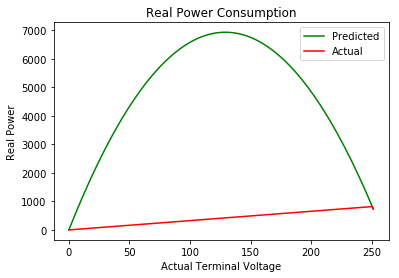

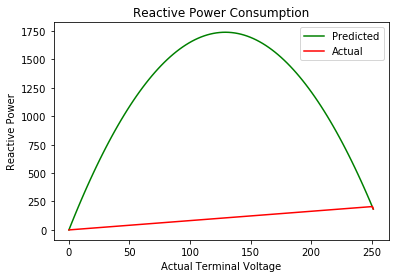

In [226]:
xx= np.linspace(x.min(),x.max(),100)
xxaxis=np.linspace(xaxis.min(),xaxis.max(),100)

poly1=np.poly1d(coeff1)
fid,cx = pyplot.subplots()

cx.plot(xxaxis,poly1(xx),'-g',label='Predicted')
cx.plot(xaxis,y1,'-r',label='Actual')
cx.legend()
cx.set_title('Real Power Consumption')
cx.set_xlabel('Actual Terminal Voltage')
cx.set_ylabel('Real Power')
pyplot.show()


poly2=np.poly1d(coeff2)
fid,cx = pyplot.subplots()

cx.plot(xxaxis,poly2(xx),'-g',label='Predicted')
cx.plot(xaxis,y2,'-r',label='Actual')
cx.legend()
cx.set_title('Reactive Power Consumption')
cx.set_xlabel('Actual Terminal Voltage')
cx.set_ylabel('Reactive Power')
pyplot.show()

Gaussian Function Curve Fitting model

In [79]:
from numpy import sqrt, pi, exp, linspace, random

In [125]:
def gaussian(x, amp, cen, wid):
   return amp * exp(-(x-cen)**2 /wid)
#(amp/(sqrt(2*pi)*wid)) * exp(-(x-cen)**2 /(2*wid**2))
#amp * exp(-(x-cen)**2 /wid)

In [153]:
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

In [202]:
def residuals(coeffs, y, t):
     return y - model(t, coeffs)

In [204]:
def model(t, coeffs):
    return coeffs[0] + coeffs[1] * np.exp( - ((t-coeffs[2])/coeffs[3])**2 )

In [126]:
from scipy.optimize import curve_fit

In [214]:
#x = linspace(-10,10, 101)
#ynew = gaussian(x, 2.33, 0.21, 1.51) + random.normal(0, 0.2, len(x))

#init_vals = [1, 0, 1]     # for [amp, cen, wid]
coefficient1, covar = curve_fit(gaussian, x, y1,maxfev=5000)#,method='lm',p0=init_vals)
coefficient2, covar = curve_fit(gaussian, x, y2,maxfev=5000)#,method='lm',p0=init_vals)
print (coefficient1)
print (coefficient2)

[  8.29282682e+02   1.04160716e+00   1.98590974e-04]
[  2.07837822e+02   1.04160716e+00   1.98590724e-04]


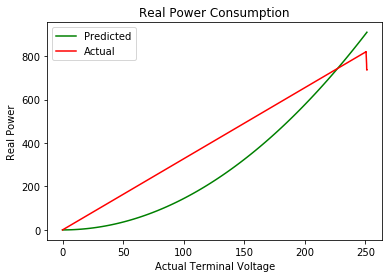

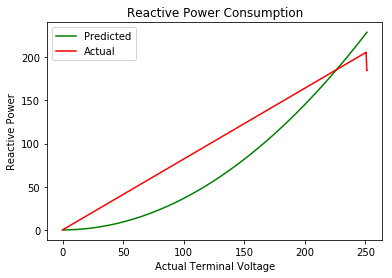

In [227]:
xx= np.linspace(x.min(),x.max(),100)
xxaxis=np.linspace(xaxis.min(),xaxis.max(),100)


polynomial1=np.poly1d(coefficient1)

fid,cx = pyplot.subplots()
cx.plot(xxaxis,polynomial1(xx),'-g',label='Predicted')
cx.plot(xaxis,y1,'-r',label='Actual')
cx.legend()
cx.set_title('Real Power Consumption')
cx.set_xlabel('Actual Terminal Voltage')
cx.set_ylabel('Real Power')
pyplot.show()



polynomial2=np.poly1d(coefficient2)
xx= np.linspace(x.min(),x.max(),100)
xxaxis=np.linspace(xaxis.min(),xaxis.max(),100)

fid,cx = pyplot.subplots()
cx.plot(xxaxis,polynomial2(xx),'-g',label='Predicted')
cx.plot(xaxis,y2,'-r',label='Actual')
cx.legend()
cx.set_title('Reactive Power Consumption')
cx.set_xlabel('Actual Terminal Voltage')
cx.set_ylabel('Reactive Power')
pyplot.show()